In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [126]:
dataset=pd.read_csv('breast_cancer.csv')

In [127]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [129]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [130]:
dataset.drop('Unnamed: 32',axis=1,inplace=True)

In [131]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [132]:
dataset.drop('id',axis=1,inplace=True)

In [133]:
dataset.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [134]:
dataset.diagnosis=[1 if value=='M' else 0 for value in dataset.diagnosis]

In [135]:
dataset["diagnosis"]=dataset['diagnosis'].astype("category",copy=False)

In [136]:
dataset['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: category
Categories (2, int64): [0, 1]

<Axes: xlabel='diagnosis'>

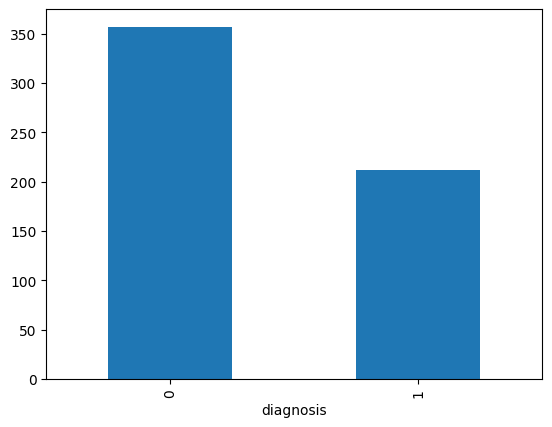

In [142]:
dataset['diagnosis'].value_counts().plot(kind='bar')

In [145]:
y=dataset["diagnosis"]
X=dataset.drop(["diagnosis"],axis=1)

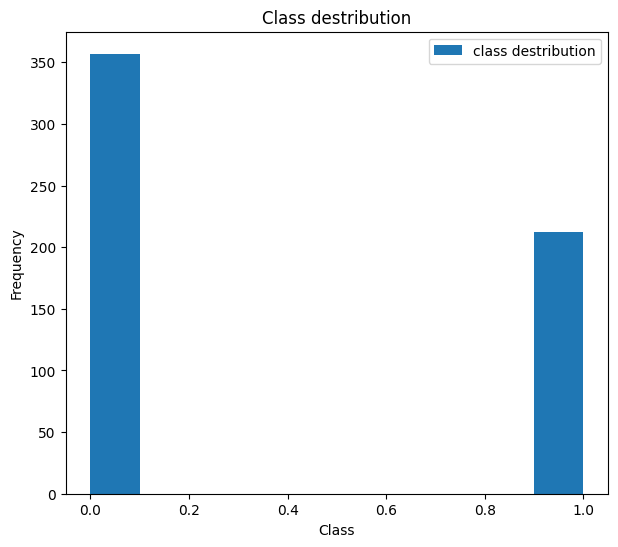

In [146]:
plt.figure(figsize=(7,6))
plt.hist(y,label='class destribution')
plt.title("Class destribution")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('class-destribution.png')

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
X_scaler=StandardScaler()
scaled_x=X_scaler.fit_transform(X)
scaled_x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [149]:
X_train,X_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=42)

In [150]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [151]:
y_pred=log_model.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [153]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy*100:.1f}%")

Accuracy : 97.4%


In [154]:
precision=precision_score(y_test,y_pred)
print(f"Precision : {precision*100:.1f}%")

Precision : 97.6%


In [155]:
recall=recall_score(y_test,y_pred)
print(f"Rrecall : {recall*100:.1f}%")

Rrecall : 95.3%


In [156]:
f1=f1_score(y_test,y_pred)
print(f"F1 Score : {f1*100:.1f}%")

F1 Score : 96.5%


In [157]:
from sklearn.metrics import classification_report

In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [159]:
confusion_metrics=confusion_matrix(y_test,y_pred)

In [160]:
confusion_metrics

array([[70,  1],
       [ 2, 41]])

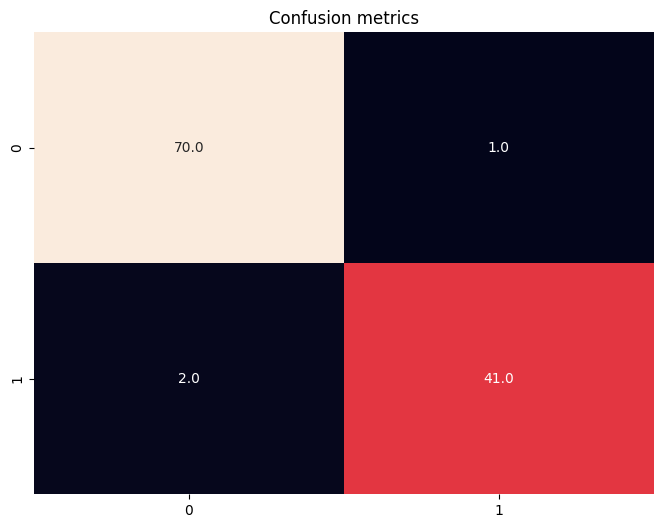

In [161]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_metrics,annot=True,fmt='.1f',cbar=False)
plt.title("Confusion metrics")
plt.show()

In [162]:
true_positive=41
true_negative=70

In [163]:
from sklearn.metrics import auc,roc_auc_score,roc_curve

In [164]:
roc_auc_score(y_test,y_pred)

np.float64(0.9697019325253848)

In [165]:
roc_curve(y_test,y_pred)

(array([0.        , 0.01408451, 1.        ]),
 array([0.        , 0.95348837, 1.        ]),
 array([inf,  1.,  0.]))

In [166]:
import pickle

In [167]:
with open('log_model.pkl','wb') as file:
    pickle.dump(log_model,file)

In [168]:
log_model.coef_

array([[ 0.43464701,  0.39719369,  0.39606985,  0.46999027,  0.06739432,
        -0.52671658,  0.80767618,  1.1077114 , -0.24153785, -0.07844689,
         1.25057276, -0.1889927 ,  0.58988574,  0.91987672,  0.31656977,
        -0.66906627, -0.17107672,  0.31431731, -0.50499861, -0.61176062,
         0.87394431,  1.35751246,  0.58604724,  0.83803013,  0.54737794,
        -0.00589749,  0.95168648,  0.78040785,  1.19559714,  0.16293183]])

In [169]:
log_model.intercept_

array([-0.32857199])

In [170]:
log_model.classes_

array([0, 1])

# ROC curve

## ROC plot TPr and FPr, ROC helps us decide threshold values.The more the curve is, the better the model is

### TPr=TP/TP+FN
### FPr=FP/FP+TN

In [171]:
TPr=41/(41+1)
FPr=2/(1+70) # = 1-specificity

#### TPR are Recal/sensitivity. TNR are specificity

In [172]:
y_pred = log_model.predict_proba(X_test)[:,1]
y_pred

array([1.14654306e-01, 9.99991258e-01, 9.96935812e-01, 5.01521801e-04,
       5.98499000e-05, 1.00000000e+00, 9.99999998e-01, 9.64771580e-01,
       3.79164333e-01, 7.45367462e-04, 4.93966092e-02, 9.87635123e-01,
       6.00401864e-03, 8.54448163e-01, 1.61667308e-03, 9.99166904e-01,
       1.84326251e-03, 1.13474951e-05, 8.16917486e-07, 9.99998888e-01,
       8.39246705e-02, 9.90428726e-03, 9.99999996e-01, 7.70484841e-05,
       1.13101503e-03, 5.55051832e-04, 1.07422913e-03, 5.92627012e-03,
       2.86512159e-03, 9.99992039e-01, 4.96416799e-04, 1.46301756e-04,
       2.22100961e-03, 5.48470111e-03, 1.40207740e-04, 2.45678512e-03,
       9.41996923e-01, 2.96314904e-03, 9.99911901e-01, 4.78570967e-02,
       7.09696777e-05, 9.99604240e-01, 2.47803511e-03, 9.58715605e-04,
       2.01819497e-02, 7.38105870e-02, 4.19429778e-04, 4.98218585e-04,
       3.08627258e-02, 6.04048156e-04, 9.99881353e-01, 9.99999949e-01,
       3.10053550e-01, 1.30035735e-02, 2.57344450e-05, 9.53464745e-03,
      

In [173]:
from sklearn.metrics import roc_curve,auc

In [174]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [175]:
fpr

array([0.        , 0.        , 0.        , 0.01408451, 0.01408451,
       0.09859155, 0.09859155, 1.        ])

In [176]:
tpr

array([0.        , 0.02325581, 0.95348837, 0.95348837, 0.97674419,
       0.97674419, 1.        , 1.        ])

In [177]:
threshold

array([           inf, 1.00000000e+00, 7.79332521e-01, 5.36575733e-01,
       4.91362284e-01, 1.12214408e-01, 8.39246705e-02, 8.16917486e-07])

In [178]:
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.99737962659679)

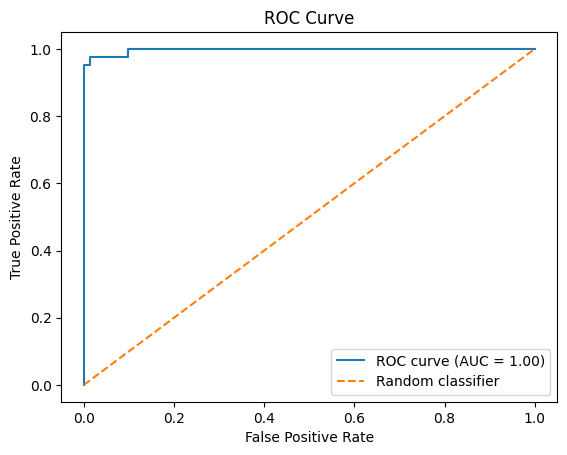

In [179]:
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig('ROC-Curve.png')
plt.show()